In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
train = pd.read_csv("Income_train.csv")
print(train.shape)

(32561, 12)


In [3]:
train.head(10)

,ID,Age,Workclass,Education,Marital.Status,Occupation,Relationship,Race,Sex,Hours.Per.Week,Native.Country,Income.Group
0,1,39,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,40,United-States,<=50K
1,2,50,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,United-States,<=50K
2,3,38,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,United-States,<=50K
3,4,53,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,United-States,<=50K
4,5,28,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40,Cuba,<=50K
5,6,37,Private,Masters,Married-civ-spouse,Exec-managerial,Wife,White,Female,40,United-States,<=50K
6,7,49,Private,9th,Married-spouse-absent,Other-service,Not-in-family,Black,Female,16,Jamaica,<=50K
7,8,52,Self-emp-not-inc,HS-grad,Married-civ-spouse,Exec-managerial,Husband,White,Male,45,United-States,>50K
8,9,31,Private,Masters,Never-married,Prof-specialty,Not-in-family,White,Female,50,United-States,>50K
9,10,42,Private,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,40,United-States,>50K


(array([27816.,     0.,  3124.,     0.,     0.,  1039.,     0.,   311.,
            0.,   271.]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <BarContainer object of 10 artists>)

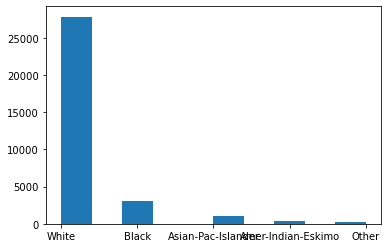

In [4]:
import seaborn as sns
plt.hist(train["Race"])

In [5]:
train['Workclass'].unique()

array(['State-gov', 'Self-emp-not-inc', 'Private', 'Federal-gov',
       'Local-gov', 'Self-emp-inc', 'Without-pay', 'Never-worked'],
      dtype=object)

In [6]:
train['Income.Group'].value_counts()

<=50K    24720
>50K      7841
Name: Income.Group, dtype: int64

In [7]:
train['Workclass'].value_counts()

Private             24532
Self-emp-not-inc     2541
Local-gov            2093
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: Workclass, dtype: int64

In [8]:
#describing the continuous variables
train.describe()

,ID,Age,Hours.Per.Week
count,32561.000000,32561.000000,32561.000000
mean,16281.000000,38.581647,40.437456
std,9399.695394,13.640433,12.347429
min,1.000000,17.000000,1.000000
25%,8141.000000,28.000000,40.000000
50%,16281.000000,37.000000,40.000000
75%,24421.000000,48.000000,45.000000
max,32561.000000,90.000000,99.000000


In [9]:
train.isnull().sum()

ID                0
Age               0
Workclass         0
Education         0
Marital.Status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Hours.Per.Week    0
Native.Country    0
Income.Group      0
dtype: int64

In [10]:
#variable transformation
categories_to_combine = ['State-gov','Self-emp-inc','Federal-gov','Without-pay','Never-worked']

for cat in categories_to_combine:
    train['Workclass'].replace({cat:'Others'}, inplace = True)

In [11]:
train.Workclass.value_counts()

Private             24532
Others               3395
Self-emp-not-inc     2541
Local-gov            2093
Name: Workclass, dtype: int64

In [12]:
train.head()

,ID,Age,Workclass,Education,Marital.Status,Occupation,Relationship,Race,Sex,Hours.Per.Week,Native.Country,Income.Group
0,1,39,Others,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,40,United-States,<=50K
1,2,50,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,United-States,<=50K
2,3,38,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,United-States,<=50K
3,4,53,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,United-States,<=50K
4,5,28,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40,Cuba,<=50K


## Label Encoding for Categorical Variables

In [13]:
from sklearn.preprocessing import LabelEncoder
cat_var =train.dtypes.loc[train.dtypes == 'object'].index
le =LabelEncoder()
for var in cat_var:
    train[var] = le.fit_transform(train[var])

In [14]:
train.head()

,ID,Age,Workclass,Education,Marital.Status,Occupation,Relationship,Race,Sex,Hours.Per.Week,Native.Country,Income.Group
0,1,39,1,9,4,0,1,4,1,40,38,0
1,2,50,3,9,2,3,0,4,1,13,38,0
2,3,38,2,11,0,5,1,4,1,40,38,0
3,4,53,2,1,2,5,0,2,1,40,38,0
4,5,28,2,9,2,9,5,2,0,40,4,0


In [15]:
train.columns

Index(['ID', 'Age', 'Workclass', 'Education', 'Marital.Status', 'Occupation',
       'Relationship', 'Race', 'Sex', 'Hours.Per.Week', 'Native.Country',
       'Income.Group'],
      dtype='object')

In [16]:
depv = 'Income.Group'
indepv = [x for x in train.columns if x not in ['ID',depv]]

In [17]:
train[depv]

0        0
1        0
2        0
3        0
4        0
        ..
32556    0
32557    1
32558    0
32559    0
32560    1
Name: Income.Group, Length: 32561, dtype: int32

In [18]:
train[indepv].head()

,Age,Workclass,Education,Marital.Status,Occupation,Relationship,Race,Sex,Hours.Per.Week,Native.Country
0,39,1,9,4,0,1,4,1,40,38
1,50,3,9,2,3,0,4,1,13,38
2,38,2,11,0,5,1,4,1,40,38
3,53,2,1,2,5,0,2,1,40,38
4,28,2,9,2,9,5,2,0,40,4


## Applying Machine Learning Model 

## Logistic Regression

In [19]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(train[indepv],train[depv])

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [20]:
p=model.predict(train[indepv])
pd.DataFrame(p)

,0
0,0
1,0
2,0
3,0
4,0
...,...
32556,0
32557,0
32558,0
32559,0


In [23]:
from sklearn.metrics import log_loss #logarthim loss

model
prob = model.predict_proba(train[indepv])
probs = prob[:,1]
loss = log_loss(train[depv],p)
loss

8.161369254004272

In [26]:
from sklearn.metrics import accuracy_score
print("Train Accuracy {:.2%}".format(accuracy_score(train[depv],p)))

Train Accuracy 76.37%


In [28]:
from sklearn.metrics import confusion_matrix,classification_report
print("Classification Report")
print (classification_report(train[depv],p))
print ("Confusion matrix")
print (confusion_matrix(train[depv],p))

Classification Report
              precision    recall  f1-score   support

           0       0.78      0.95      0.86     24720
           1       0.53      0.18      0.27      7841

    accuracy                           0.76     32561
   macro avg       0.66      0.56      0.56     32561
weighted avg       0.72      0.76      0.72     32561

Confusion matrix
[[23471  1249]
 [ 6445  1396]]


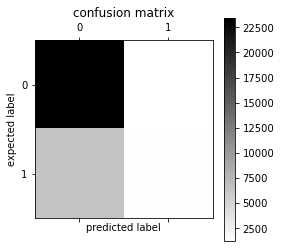

In [29]:
import matplotlib.pyplot as plt
plt.matshow(confusion_matrix(train[depv],p), cmap=plt.cm.binary, interpolation='nearest')
plt.title('confusion matrix')
plt.colorbar()
plt.ylabel('expected label')
plt.xlabel('predicted label')
plt.show()

## Decision Trees

In [32]:
from sklearn.tree import DecisionTreeClassifier

In [33]:
model = DecisionTreeClassifier(max_depth = 10, min_samples_leaf = 100, max_features = 'sqrt')
model.fit(train[indepv],train[depv])
predicted_train = model.predict(train[indepv])
true_value = train[depv]
print("Train Accuracy {:.2%}".format(accuracy_score(true_value,predicted_train)))

Train Accuracy 82.08%


In [34]:
confusion_matrix(true_value,predicted_train)

array([[22462,  2258],
       [ 3576,  4265]], dtype=int64)

In [35]:
from sklearn.metrics import classification_report
classification_report(true_value, predicted_train)

'              precision    recall  f1-score   support\n\n           0       0.86      0.91      0.89     24720\n           1       0.65      0.54      0.59      7841\n\n    accuracy                           0.82     32561\n   macro avg       0.76      0.73      0.74     32561\nweighted avg       0.81      0.82      0.81     32561\n'

## Random Forest

In [36]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(max_depth = 20, min_samples_leaf = 50, max_features = 'sqrt',n_estimators = 1000)
model.fit(train[indepv],train[depv])
predicted_train = model.predict(train[indepv])
true_value = train[depv]
print("Train Accuracy {:.2%}".format(accuracy_score(true_value,predicted_train)))

Train Accuracy 84.06%


KNN

In [37]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

model = KNeighborsClassifier(n_neighbors = 50)

model.fit(train[indepv],train[depv])
predicted_train = model.predict(train[indepv])
true_value = train[depv]
print("Train Accuracy {:.2%}".format(accuracy_score(true_value,predicted_train)))

Train Accuracy 80.37%


In [38]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
model = KNeighborsClassifier(n_neighbors = 100)
model.fit(train[indepv],train[depv])
predicted_train = model.predict(train[indepv])
true_value = train[depv]
print("Train Accuracy {:.2%}".format(accuracy_score(true_value,predicted_train)))

Train Accuracy 79.40%


In [31]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
model = KNeighborsClassifier(n_neighbors = 20)
model.fit(train[indepv],train[depv])
predicted_train = model.predict(train[indepv])
true_value = train[depv]
print("Train Accuracy {:.2%}".format(accuracy_score(true_value,predicted_train)))

Train Accuracy 81.95%


In [39]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
model = KNeighborsClassifier(n_neighbors = 5)
model.fit(train[indepv],train[depv])
predicted_train = model.predict(train[indepv])
true_value = train[depv]
print("Train Accuracy {:.2%}".format(accuracy_score(true_value,predicted_train)))

Train Accuracy 85.74%


In [40]:
from sklearn.metrics import confusion_matrix,classification_report
print("Classification Report")
print (classification_report(true_value,predicted_train))
print ("Confusion matrix")
print (confusion_matrix(true_value,predicted_train))

Classification Report
              precision    recall  f1-score   support

           0       0.90      0.92      0.91     24720
           1       0.72      0.66      0.69      7841

    accuracy                           0.86     32561
   macro avg       0.81      0.79      0.80     32561
weighted avg       0.85      0.86      0.86     32561

Confusion matrix
[[22713  2007]
 [ 2637  5204]]


Naive Bayes

In [47]:
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()

model.fit(train[indepv],train[depv])

predicted_train = model.predict(train[indepv])

true_value = train[depv]

print("Train Accuracy {:.2%}".format(accuracy_score(true_value,predicted_train)))

Train Accuracy 75.98%


In [48]:
from sklearn.metrics import confusion_matrix,classification_report
print("Classification Report")
print (classification_report(true_value,predicted_train))
print ("Confusion matrix")
print (confusion_matrix(true_value,predicted_train))

Classification Report
              precision    recall  f1-score   support

           0       0.89      0.78      0.83     24720
           1       0.50      0.68      0.58      7841

    accuracy                           0.76     32561
   macro avg       0.69      0.73      0.71     32561
weighted avg       0.79      0.76      0.77     32561

Confusion matrix
[[19370  5350]
 [ 2472  5369]]
